In [1]:
!head -20 names/yob1880.txt

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [5]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [6]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [14]:
years = range(1880,2018)

In [15]:
pieces = []

In [16]:
columns = ['name', 'sex', 'births']

In [17]:
for year in years:
    path = 'names/yob%d.txt'% year
    frame = pd.read_csv(path, names=columns)
    frame ['year'] = year
    pieces.append(frame)

In [18]:
names = pd.concat(pieces, ignore_index=True)

In [19]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [21]:
total_births = names.pivot_table('births', 'year', 'sex', aggfunc=sum)

In [22]:
total_births.tail()

sex,F,M
year,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


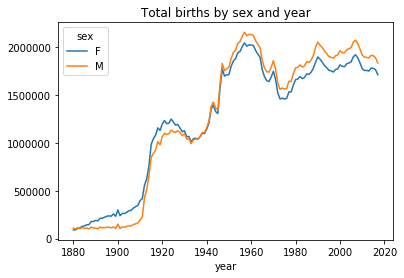

In [25]:
total_births.plot(title='Total births by sex and year')

In [27]:
def add_prop(group):
    #Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [28]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [31]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [34]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [35]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [36]:
boys = top1000[top1000.sex == 'M']

In [37]:
girls = top1000[top1000.sex == 'F']

In [38]:
total_births = top1000.pivot_table('births', 'year', 'name', aggfunc=sum)

In [39]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


In [43]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f245e5f5890>,
      dtype=object)

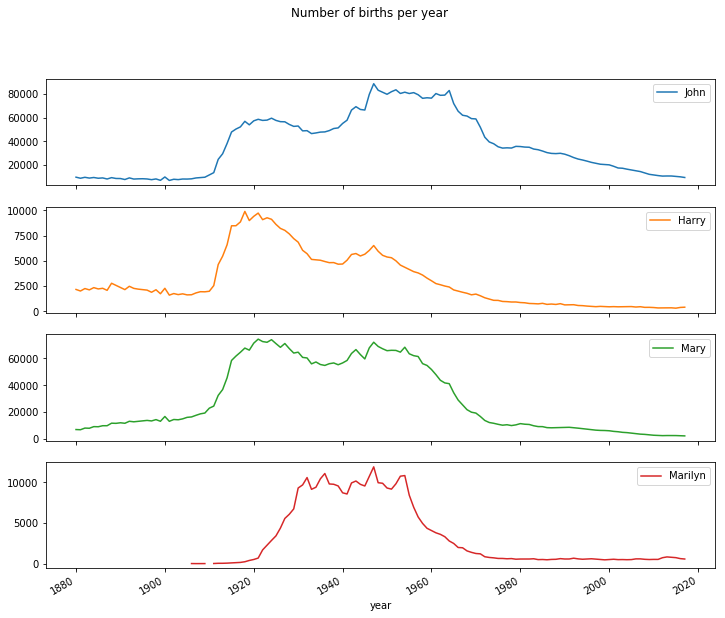

In [48]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [49]:
table = top1000.pivot_table('prop', 'year', 'sex', aggfunc=sum)

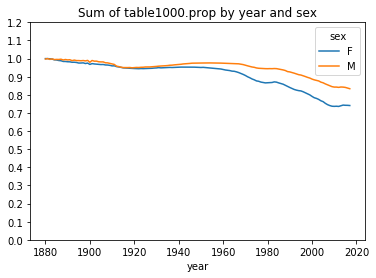

In [53]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 20))

df = boys[boys.year == 2010]

In [56]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
944,James,M,5927,1880,0.053642
945,Charles,M,5348,1880,0.048402
946,George,M,5126,1880,0.046393
947,Frank,M,3242,1880,0.029342
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2415,1880,0.021857


In [57]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [58]:
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038952
260881    0.047850
260882    0.056594
260883    0.065178
260884    0.073443
260885    0.081552
260886    0.089635
Name: prop, dtype: float64

In [59]:
prop_cumsum.values.searchsorted(0.5)

116

In [60]:
df = boys[boys.year == 1900]

In [61]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [63]:
in1900.values.searchsorted(0.5) + 1

25

In [65]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [66]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [67]:
diversity = diversity.unstack('sex')

In [68]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


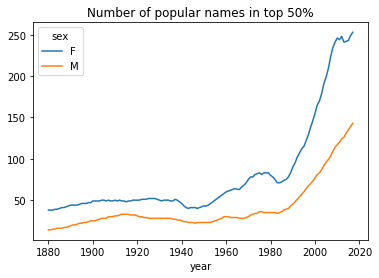

In [69]:
diversity.plot(title="Number of popular names in top 50%")